<a href="https://colab.research.google.com/github/amatyaagrata/ConceptandTechnologyofAI/blob/Workshop2/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/bank.csv')
# Display first rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object


In [ ]:
# Check DataFrame info
df.info()

# a.Columns with object dtype
object_columns = df.select_dtypes(include='object').columns
print("Object Columns:", object_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    

(b) unique values of those columns.

In [ ]:
# (b) Unique values of these columns
for col in object_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital':
['married' 'single' 'divorced']
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default':
['no' 'yes']
Unique values in 'housing':
['yes' 'no']
Unique values in 'loan':
['no' 'yes']
Unique values in 'contact':
['unknown' 'cellular' 'telephone']
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in 'y':
['no' 'yes']


(c) check for the total number of null values in each column.

In [ ]:
# (c) Total Null Values
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [ ]:
# Drop object dtype columns
df_numeric = df.drop(columns=object_columns)

# Save to new CSV
df_numeric.to_csv('/banknumericdata.csv', index=False)

df_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
df_num = pd.read_csv('/banknumericdata.csv')

# Summary statistics
df_num.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv("/medical_students_dataset.csv")
df.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [ ]:
df.isnull().sum()


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [ ]:
# Fill age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
print("---Filled age with mean---\n",df['Age'])

# Fill gender with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print("---Filled gender with mode---\n",df['Gender'])

# Fill Height with median (assuming this was intended instead of 'Marks')
df['Height'] = df['Height'].fillna(df['Height'].median())
print("---Filled height with mean---\n",df['Height'])


---Filled age with mean---
 0         18.000000
1         26.021561
2         32.000000
3         30.000000
4         23.000000
            ...    
199995    24.000000
199996    29.000000
199997    34.000000
199998    30.000000
199999    20.000000
Name: Age, Length: 200000, dtype: float64
---Filled gender with mode---
 0         Female
1           Male
2         Female
3           Male
4         Female
           ...  
199995      Male
199996    Female
199997    Female
199998    Female
199999    Female
Name: Gender, Length: 200000, dtype: object
---Filled height with mean---
 0         161.777924
1         152.069157
2         182.537664
3         182.112867
4         174.899914
             ...    
199995    176.503260
199996    163.917675
199997    174.899914
199998    156.446944
199999    153.927409
Name: Height, Length: 200000, dtype: float64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
df = df.drop_duplicates()
print(df)

        Student ID        Age  Gender      Height     Weight Blood Type  \
0              1.0  18.000000  Female  161.777924  72.354947          O   
1              2.0  26.021561    Male  152.069157  47.630941          B   
2              3.0  32.000000  Female  182.537664  55.741083          A   
3              NaN  30.000000    Male  182.112867  63.332207          B   
4              5.0  23.000000  Female  174.899914  46.234173          O   
...            ...        ...     ...         ...        ...        ...   
199995         NaN  24.000000    Male  176.503260  95.756997          B   
199996     99997.0  29.000000  Female  163.917675  45.225194        NaN   
199997     99998.0  34.000000  Female  174.899914  99.648914        NaN   
199998     99999.0  30.000000  Female  156.446944  50.142824          A   
199999    100000.0  20.000000  Female  153.927409  99.928405          O   

              BMI  Temperature  Heart Rate  Blood Pressure  Cholesterol  \
0       27.645835       

Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/Titanic-Dataset.csv')

In [ ]:
cols = ['Name','Pclass','Sex','Age','Fare','Survived']
sub = df[cols]
# print(df)

# Keep only first class passengers
sub = sub[sub['Pclass'] == 1]
print(sub)


                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   

        Fare  Survived  
1    71.2833  

In [ ]:
sub['Fare'].mean()
sub['Fare'].median()
sub['Fare'].max()
sub['Fare'].min()
print("Mean:",sub['Fare'].mean())
print("Median:",sub['Fare'].median())
print("Max:",sub['Fare'].max())
print("Min:",sub['Fare'].min())


Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
# Count total missing values in Age column
null_age_count = sub['Age'].isnull().sum()
print("Number of null values in Age:", null_age_count)

# Drop rows with null Age
sub = sub.dropna(subset=['Age'])

sub.head()




Number of null values in Age: 30


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [ ]:
# One-hot encode the 'Embarked' column
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Show the encoded columns
embarked_encoded.head()


,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


2. Add these new columns to the original DataFrame.

In [ ]:
df = pd.concat([df, embarked_encoded], axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


3. Drop the original ’Embarked’ column.

In [ ]:
df = df.drop(columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [ ]:
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


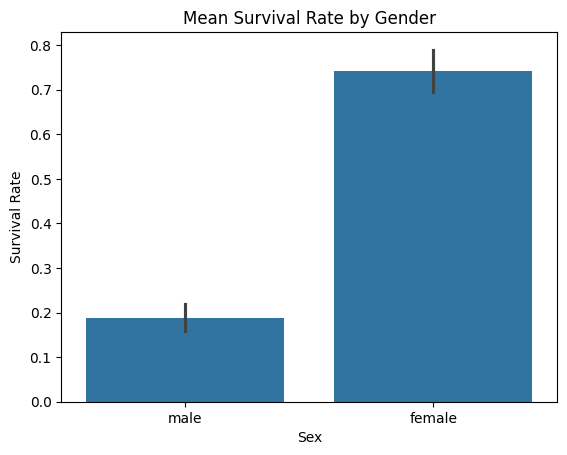

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

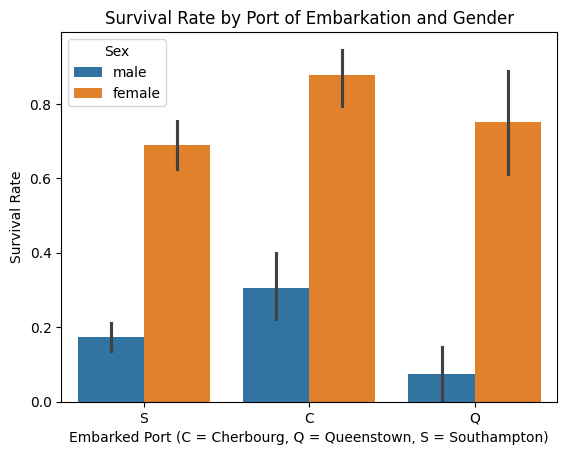

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Recreate 'Embarked' column for plotting purposes since it was dropped earlier
# This assumes that Embarked_C, Embarked_Q, Embarked_S are present in the DataFrame
df_plot = df.copy() # Create a copy to avoid modifying the original df if it's needed for other tasks
df_plot['Embarked_Recreated'] = np.select(
    [df_plot['Embarked_C'], df_plot['Embarked_Q'], df_plot['Embarked_S']],
    ['C', 'Q', 'S'],
    default=None # Changed np.nan to None for consistent dtype with string choices
)

sns.barplot(x='Embarked_Recreated', y='Survived', hue='Sex', data=df_plot)

plt.title("Survival Rate by Port of Embarkation and Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.show()